In [105]:
# import basic libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

# PROBLEM 1

## Given information:
An unknown plant has transfer function H(z)=(1-z^(-10))/(1-z^(-1)). Note that this transfer function has weights w(n)=1 for n [0,9]. Its output is added with white Gaussian noise of power N=0.1. Its input is alpha stable noise with α=1.8 and γ=1.

#### Generate 10,000 samples of white Gaussian noise and alpha stable noise. Take the autocorrelation and power spectral density to confirm input and output.

In [58]:
# generate 10,000 samples of the white Gaussian noise

number_samples = 10000
mu = 0
std = 1
power = 0.1
white_noise = np.random.normal(mu, std*power, size=number_samples)

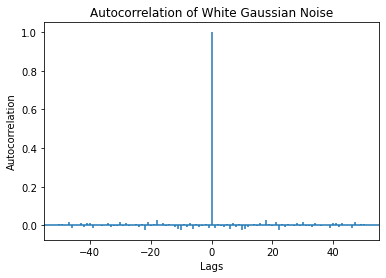

In [59]:
# plot the autocorrelation of the white Gaussian noise to confirm

plt.title("Autocorrelation of White Gaussian Noise")
plt.xlabel("Lags")  
plt.ylabel("Autocorrelation")
_ = plt.acorr(white_noise, maxlags = 50)

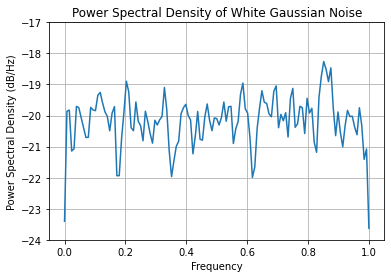

In [60]:
# plot the power spectral density of the white Gaussian noise to confirm

plt.title("Power Spectral Density of White Gaussian Noise")
_ = plt.psd(white_noise)

In [61]:
# generate 10,000 samples of the alpha stable noise

from scipy.stats import levy_stable

alpha = 1.5
gamma = 1
stable_noise = levy_stable.rvs(alpha=alpha, beta=0, loc=0, scale=gamma, size=10000)

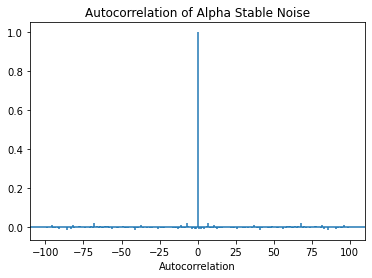

In [62]:
# plot the autocorrelation of the alpha stable noise

plt.title("Autocorrelation of Alpha Stable Noise")
plt.xlabel("Lags")  
plt.xlabel("Autocorrelation")
_ = plt.acorr(stable_noise, maxlags = 100)

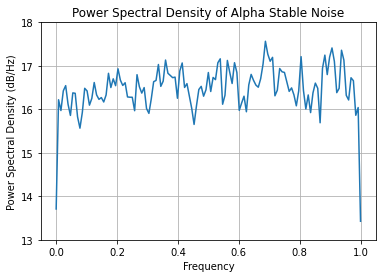

In [75]:
# plot the power spectral density of the alpha stable noise

plt.title("Power Spectral Density of Alpha Stable Noise")
_ = plt.psd(stable_noise)

In [66]:
# define optimal weight vector (known from the given transfer function)

w_star = np.array([1,1,1,1,1,1,1,1,1,1])

In [104]:
# convolve input with filter weights and add noise

output = np.convolve(stable_noise, w_star)[:10000] + white_noise

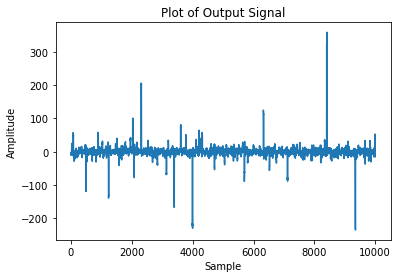

In [94]:
# plot the output

plt.title("Plot of Output Signal")
plt.xlabel("Sample")  
plt.ylabel("Amplitude")
plt.plot(output)

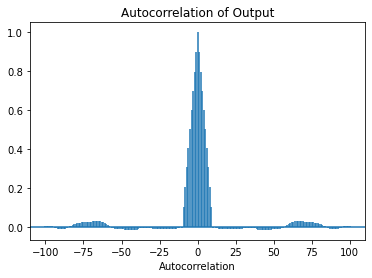

In [76]:
# plot the autocorrelation of the ouput

plt.title("Autocorrelation of Output")
plt.xlabel("Lags")  
plt.xlabel("Autocorrelation")
_ = plt.acorr(output, maxlags = 100)

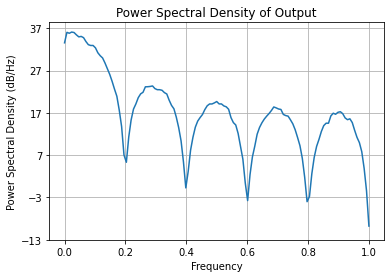

In [77]:
# plot the power spectral density of the output

plt.title("Power Spectral Density of Output")
_ = plt.psd(output)

## Design a Wiener filter to identify the unknown plant transfer function. Use the normalized MSE as the quality of the identification (normalize by the power of the input).

#### Use filters of order 5, 15, and 30 and windows of size 100, 500, and 1000 samples to estimate the autocorrelation function and cross-correlation vector. Compare the accuracy of the system identification by computing the weighted error power (WSNR). 

In [65]:
# define our accuracy metric, weighted error power (WSNR)

def wsnr(actual, ideal):
    '''Given a set of actual and ideal weights, calculate the weighted error power'''
    actual = np.array(actual)
    ideal = np.array(ideal)
    numerator = ideal.T@ideal
    denominator = (ideal-actual).T@(ideal-actual)
    return 10*np.log(numerator/denominator)

In [157]:
# create Wiener filters to test (orders of 5, 15, 30 and size of 100, 500, and 1000)
from scipy import linalg

def wiener_weights(in_sig, out_sig, order, size):
    '''Find optimal filter weights using Wiener filter given and input and output signal'''
#     r = np.array(signal.correlate(in_sig, in_sig, mode='full'))
#     R = toeplitz(r,np.hstack((r[0], np.conj(r[1:]))))
#     P = np.array(signal.correlate(in_sig, out_sig))
#     return np.linalg.inv(R)@P.T
    A = np.matrix(np.zeros((size, order)))
    for m in range(size):
        A[m,:] = out_sig[m+np.arange(order)].T
    return np.linalg.inv(A.T@A)@A.T@in_sig[:size]

# from scipy.signal.signaltools import wiener

# filtered = wiener(stable_noise[0:99], 5)
# print(filtered)
# plt.plot(filtered)
# orders = [5,15,30]
# windows = [100, 500, 1000]
# filtered_5 = wiener(img, (5, 5))  #Filter the image

In [162]:
w_est = wiener_weights(stable_noise, output, 30, 1000)

In [163]:
wsnr(w_est,w_star)

ValueError: operands could not be broadcast together with shapes (10,) (1,30) 

In [154]:
linalg.toeplitz(signal.correlate(stable_noise[0:9], stable_noise[0:9], mode='full')).shape

(17, 17)

In [82]:
# estimate the autocorrelation and cross-correlation for each Wiener filter



In [83]:
# computer the WSNR and compare the accuracy of the system identification for each Wiener filter



#### Apply the Wiener filter in different windows of the 10,000 sample input, and conclude whether you need this procedure or if one window suffices.

In [84]:
# now apply the best Wiener filter to different windows of the input

We do or do notttttttttt neeeeeeeeed thissssssssssssssssss............ ADD INFO HERE

#### Show the effect of increasing the noise N (N = 0.3, 1.5) in your results. Comment on the Wiener filter parameters. Explain what you observe.

#### Repeat with the LMS algorithm and compare performance with the Wiener solution.

# PROBLEM 2